In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
%matplotlib inline



## A. Importing, cleaning and numerical summaries

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [3]:
print('number of observations = ',data.shape[0], ', number of features = ',data.shape[1])
columns = data.columns
data.dtypes


number of observations =  153 , number of features =  12


Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [4]:
data.isna().sum()

#2 missing value in Job Satisfaction column : we remove these 2 rows
data = data.dropna()

In [5]:
#mean, minimum and maximum value (and more) for each numerical column
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [6]:
#list of the 10 happiest countries
happiest = data.sort_values('Happiness Score', ascending = False )
happiest = happiest.reset_index(drop=True)
ten_happiest = happiest.loc[0:9]
ten_happiest['Country']



0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8      Australia
9         Sweden
Name: Country, dtype: object

In [7]:
#list of the 10 least happy countries
least_happy = data.sort_values('Happiness Score')
least_happy = least_happy.reset_index(drop=True)
ten_least_happy = least_happy.loc[0:9]
ten_least_happy['Country']

0    Central African Republic
1                     Burundi
2                    Tanzania
3                       Syria
4                      Rwanda
5                        Togo
6                      Guinea
7                     Liberia
8                       Yemen
9                       Haiti
Name: Country, dtype: object

## B. Indexing and grouping

In [8]:
regions = data['Region'].unique()

In [9]:
for i in regions:
    export = data[data['Region'] == i]
    export.to_csv(r'C:\Users\Asma\EPFL cos\1st project\{0}.csv'.format(i), index=False)

In [10]:
#creation of the different dataset : data_Africa, data_Latin_America etc

var_holder = {}
 
for i in regions:
    name = i.replace(" ", "_")
    var_holder['data_' + name] = pd.read_csv(i+'.csv')
 
locals().update(var_holder)


In [11]:
#Europe contains only one country, Ukraine, we will add it to the Europe region with the most similar mean features
data_Eastern_Europe.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,70.619048,5.498952,1.178098,1.281235,0.681838,0.311535,0.170583,0.050637,1.825065,77.628571
std,18.977556,0.402033,0.162833,0.190789,0.076126,0.120501,0.092248,0.045815,0.384485,6.272730
min,40.000000,4.644000,0.728871,0.803685,0.541452,0.095731,0.000000,0.000000,0.996139,68.500000
25%,56.000000,5.237000,1.069318,1.150091,0.638567,0.234232,0.113178,0.024211,1.621249,73.300000
50%,67.000000,5.569000,1.222556,1.258190,0.687763,0.295400,0.158466,0.041238,1.797723,77.100000
75%,83.000000,5.838000,1.291788,1.445712,0.708218,0.373783,0.242649,0.059308,2.010541,82.100000
max,109.000000,6.098000,1.355938,1.505059,0.844715,0.572576,0.328867,0.183249,2.807808,88.700000


In [12]:
data_Western_Europe.describe()

#We add Ukraine to western_Europe because it's coherent geographically and with the data
data_Eastern_Europe = pd.concat([data_Eastern_Europe, data_Europe]).reset_index(drop=True)
del var_holder['data_Europe']
regions = np.delete(regions, 6)


In [13]:
hap_mean = []
for k,v in var_holder.items():
    hap_mean.append(v['Happiness Score'].mean())
    
happiness_mean = pd.Series(hap_mean, index=regions)
happiness_mean.sort_values(ascending=False)


North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.498952
Asia-Pacific      5.358326
Africa            4.254581
dtype: float64

The europeans are, on average, less happy than the African while their Economy, Social support and Health are better...

In [14]:
#Number of countries with a happiness score > 6.0 vs #countrise in the region

for k,v in var_holder.items():
    print(k, ' : ', v[v['Happiness Score'] > 6].shape[0], 'vs', v.shape[0])
    

data_Western_Europe  :  17 vs 19
data_Africa  :  0 vs 43
data_Eastern_Europe  :  1 vs 21
data_Asia-Pacific  :  11 vs 43
data_Latin_America  :  13 vs 22
data_North_America  :  2 vs 2


In [15]:
#max , min and range of happiness score

for k,v in var_holder.items():
    print(k)
    print('max = ', v['Happiness Score'].max())
    print( 'min = ', v['Happiness Score'].min())
    print( 'range = ', (v['Happiness Score'].max() - v['Happiness Score'].min()), '\n')

    

data_Western_Europe
max =  7.537000179
min =  5.195000172
range =  2.3420000069999993 

data_Africa
max =  5.872000217
min =  2.6930000780000003
range =  3.179000139 

data_Eastern_Europe
max =  6.09800005
min =  4.644000053
range =  1.4539999969999995 

data_Asia-Pacific
max =  7.31400013
min =  3.461999893
range =  3.852000237 

data_Latin_America
max =  7.078999996
min =  3.6029999260000003
range =  3.47600007 

data_North_America
max =  7.315999985
min =  6.993000031
range =  0.32299995400000014 



The largest range of happiness scores is in the region Asia-Pacific.

## C. Bar plot of the Happiness Score

Text(0.5, 1.0, 'Happiness Score of the 10 happiest coutrnies')

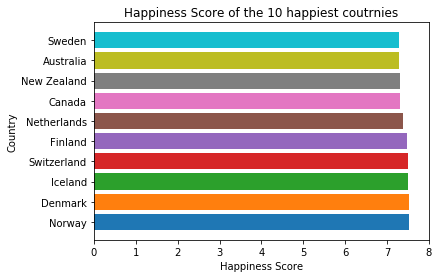

In [16]:
colormap = plt.cm.tab10(range(len(ten_happiest)))
plt.barh(ten_happiest['Country'], ten_happiest['Happiness Score'], color = colormap)
plt.xlim([0,8])
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score of the 10 happiest coutrnies')



#### Influence of Economy, Family, Health, Generosity, Corruption and Dystopia on Happiness Score

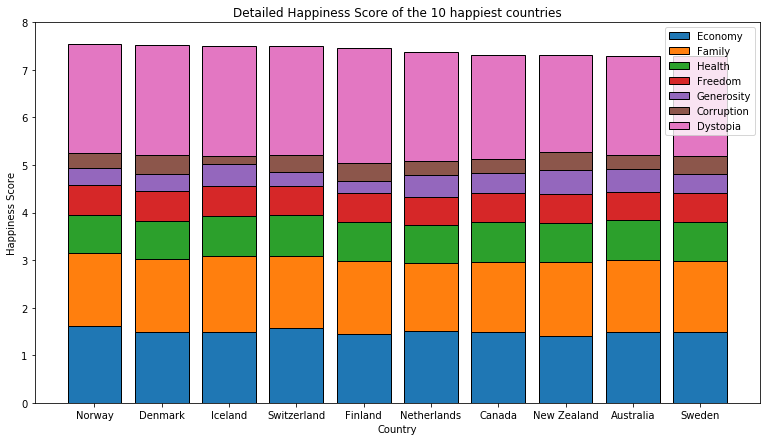

In [17]:
plt.figure(figsize = (13,7))
plt.bar(ten_happiest['Country'], ten_happiest['Economy'], edgecolor='black', label='Economy')
plt.bar(ten_happiest['Country'], ten_happiest['Family'], edgecolor='black', bottom = ten_happiest['Economy'], label='Family' )
plt.bar(ten_happiest['Country'], ten_happiest['Health'], edgecolor='black', bottom = ten_happiest['Economy']+ten_happiest['Family'], label='Health' )
plt.bar(ten_happiest['Country'], ten_happiest['Freedom'], edgecolor='black', bottom = (ten_happiest['Economy']+ten_happiest['Family'] +ten_happiest['Health']), label='Freedom')
plt.bar(ten_happiest['Country'], ten_happiest['Generosity'], edgecolor='black', bottom = (ten_happiest['Economy']+ten_happiest['Family'] +ten_happiest['Health']+ ten_happiest['Freedom']), label='Generosity')
plt.bar(ten_happiest['Country'], ten_happiest['Corruption'], edgecolor='black', bottom = (ten_happiest['Economy']+ten_happiest['Family'] +ten_happiest['Health']+ ten_happiest['Freedom']+ ten_happiest['Generosity']), label='Corruption')
plt.bar(ten_happiest['Country'], ten_happiest['Dystopia'], edgecolor='black', bottom = (ten_happiest['Economy']+ten_happiest['Family'] +ten_happiest['Health']+ ten_happiest['Freedom']+ ten_happiest['Generosity']+ ten_happiest['Corruption']), label='Dystopia')

plt.ylim([0,8])
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Detailed Happiness Score of the 10 happiest countries')
plt.legend()


#### Same but for Africa, we divide the total graph in 3:

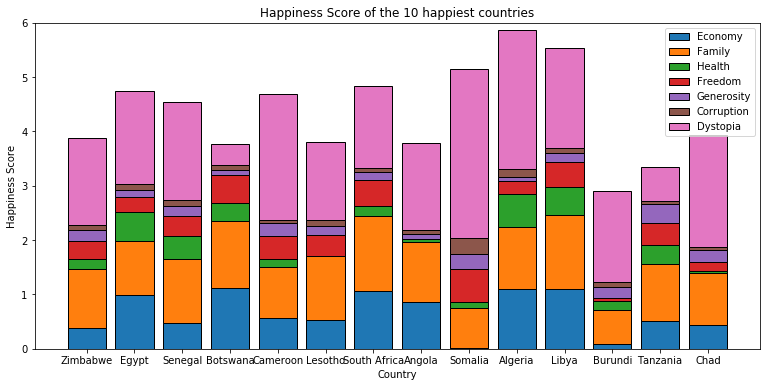

In [18]:
plt.figure(figsize = (13,6))
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Economy'], edgecolor='black', label='Economy')
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Family'], edgecolor='black', bottom = data_Africa[:14]['Economy'], label='Family' )
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Health'], edgecolor='black', bottom = data_Africa[:14]['Economy']+data_Africa[:14]['Family'], label='Health' )
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Freedom'], edgecolor='black', bottom = (data_Africa[:14]['Economy']+data_Africa[:14]['Family'] +data_Africa[:14]['Health']), label='Freedom')
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Generosity'], edgecolor='black', bottom = (data_Africa[:14]['Economy']+data_Africa[:14]['Family'] +data_Africa[:14]['Health']+ data_Africa[:14]['Freedom']), label='Generosity')
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Corruption'], edgecolor='black', bottom = (data_Africa[:14]['Economy']+data_Africa[:14]['Family'] +data_Africa[:14]['Health']+ data_Africa[:14]['Freedom']+ data_Africa[:14]['Generosity']), label='Corruption')
plt.bar(data_Africa[:14]['Country'], data_Africa[:14]['Dystopia'], edgecolor='black', bottom = (data_Africa[:14]['Economy']+data_Africa[:14]['Family'] +data_Africa[:14]['Health']+ data_Africa[:14]['Freedom']+ data_Africa[:14]['Generosity']+ data_Africa[:14]['Corruption']), label='Dystopia')

plt.ylim([0,6])
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Happiness Score of the 10 happiest countries')
plt.legend()


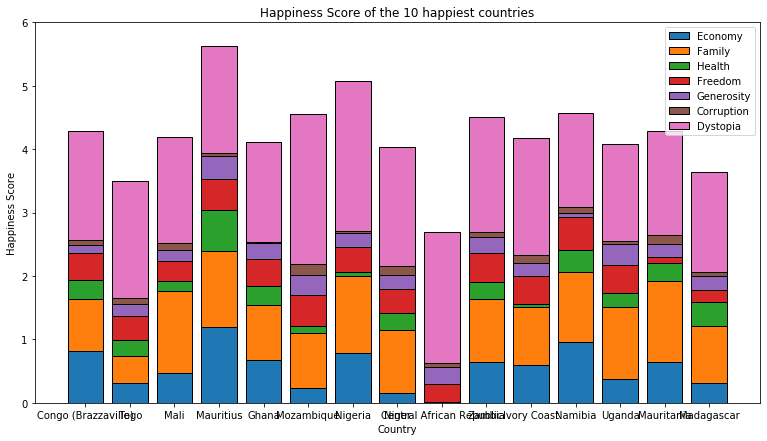

In [19]:
plt.figure(figsize = (13,7))
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Economy'], edgecolor='black', label='Economy')
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Family'], edgecolor='black', bottom = data_Africa[14:29]['Economy'], label='Family' )
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Health'], edgecolor='black', bottom = data_Africa[14:29]['Economy']+data_Africa[14:29]['Family'], label='Health' )
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Freedom'], edgecolor='black', bottom = (data_Africa[14:29]['Economy']+data_Africa[14:29]['Family'] +data_Africa[14:29]['Health']), label='Freedom')
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Generosity'], edgecolor='black', bottom = (data_Africa[14:29]['Economy']+data_Africa[14:29]['Family'] +data_Africa[14:29]['Health']+ data_Africa[14:29]['Freedom']), label='Generosity')
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Corruption'], edgecolor='black', bottom = (data_Africa[14:29]['Economy']+data_Africa[14:29]['Family'] +data_Africa[14:29]['Health']+ data_Africa[14:29]['Freedom']+ data_Africa[14:29]['Generosity']), label='Corruption')
plt.bar(data_Africa[14:29]['Country'], data_Africa[14:29]['Dystopia'], edgecolor='black', bottom = (data_Africa[14:29]['Economy']+data_Africa[14:29]['Family'] +data_Africa[14:29]['Health']+ data_Africa[14:29]['Freedom']+ data_Africa[14:29]['Generosity']+ data_Africa[14:29]['Corruption']), label='Dystopia')

plt.ylim([0,6])
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Happiness Score of the 10 happiest countries')
plt.legend()


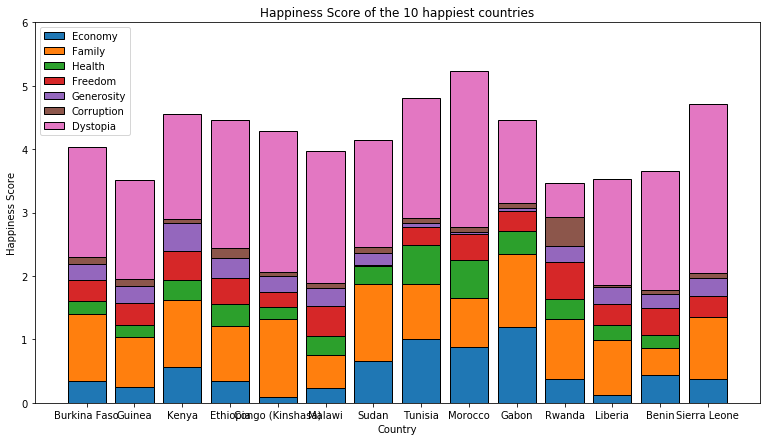

In [20]:
plt.figure(figsize = (13,7))
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Economy'], edgecolor='black', label='Economy')
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Family'], edgecolor='black', bottom = data_Africa[29:]['Economy'], label='Family' )
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Health'], edgecolor='black', bottom = data_Africa[29:]['Economy']+data_Africa[29:]['Family'], label='Health' )
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Freedom'], edgecolor='black', bottom = (data_Africa[29:]['Economy']+data_Africa[29:]['Family'] +data_Africa[29:]['Health']), label='Freedom')
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Generosity'], edgecolor='black', bottom = (data_Africa[29:]['Economy']+data_Africa[29:]['Family'] +data_Africa[29:]['Health']+ data_Africa[29:]['Freedom']), label='Generosity')
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Corruption'], edgecolor='black', bottom = (data_Africa[29:]['Economy']+data_Africa[29:]['Family'] +data_Africa[29:]['Health']+ data_Africa[29:]['Freedom']+ data_Africa[29:]['Generosity']), label='Corruption')
plt.bar(data_Africa[29:]['Country'], data_Africa[29:]['Dystopia'], edgecolor='black', bottom = (data_Africa[29:]['Economy']+data_Africa[29:]['Family'] +data_Africa[29:]['Health']+ data_Africa[29:]['Freedom']+ data_Africa[29:]['Generosity']+ data_Africa[29:]['Corruption']), label='Dystopia')

plt.ylim([0,6])
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Happiness Score of the 10 happiest countries')
plt.legend()


## D. Histogram of Job Satisfaction

In [21]:
def job_cat(x):
    if x>90:
        return '90%-100%'
    elif x>80:
        return '80%-90%'
    elif x>70:
        return '70%-80%'
    elif x>60:
        return '60%-70%'
    elif x>50:
        return '50%-60%'
    else:
        return '40%-50%'

#we check that job satisfaction is always >40:
data[data['Job Satisfaction'] <=40].shape[0]

0

(40, 100)

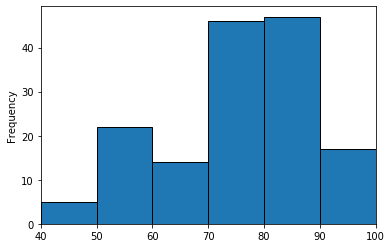

In [22]:
#Let's apply our function to Job Satisfaction column to plot our histogram:

data_hist = data.copy()
data_hist['Job Satisfaction'] = data_hist['Job Satisfaction'].map( lambda x : job_cat(x))

colormap = plt.cm.tab10(range(6))
data['Job Satisfaction'].plot.hist(bins = 6, range=(40,100), edgecolor = 'black')
#plt.bar(data['Job Satisfaction'], height='frequency')
plt.xlim([40,100])


## E. Pairwise Scatter plots

Let's visualize the Happiness Score versus each of the other variables

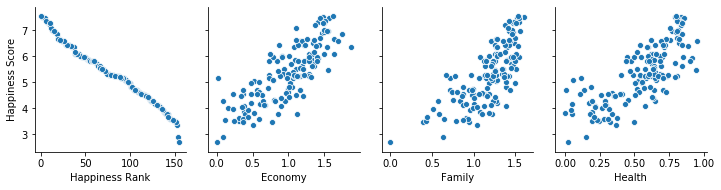

In [23]:
sns.pairplot(data, x_vars = ['Happiness Rank', 'Economy', 'Family',
       'Health'], y_vars=['Happiness Score'])

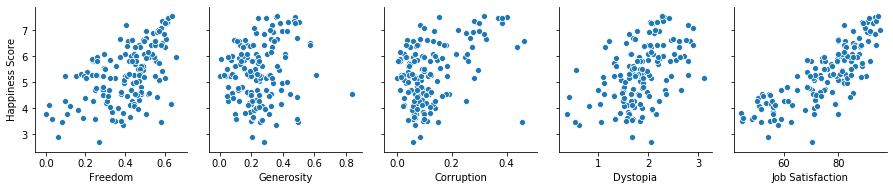

In [24]:
sns.pairplot(data, x_vars = ['Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction'], y_vars=['Happiness Score'])

The happiness rank is linearly derived from the happiness score. We can identify 4 others variables with a linear dependancy with the happiness score: Economy, Family, Health and Job Satisfaction.

## F. Correlation

In [25]:
data.corr().abs()['Happiness Score']

Happiness Rank      0.992663
Happiness Score     1.000000
Economy             0.808678
Family              0.749612
Health              0.777731
Freedom             0.567948
Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

Without considering the Happiness Rank, which is directly derived from the Happiness Score, the highest correlation is with Economy. The correlation coefficients confirm what we saw with the pairplots.

## G. Probabilities

In [26]:
P_western_europe = data_Western_Europe.shape[0]/data.shape[0]
P_happiness_over_6 = data[data['Happiness Score'] > 6].shape[0] / data.shape[0]
P_western_europe_and_happiness_over_6 = data_Western_Europe[data_Western_Europe['Happiness Score'] > 6].shape[0] / data.shape[0]

P_western_europe_while_happiness_over_6 = P_western_europe * P_western_europe_and_happiness_over_6 / P_western_europe_and_happiness_over_6

print('The proability that randomly selected country with Happiness score over 6.0 is from Western Europe is', P_western_europe_while_happiness_over_6)

The proability that randomly selected country with Happiness score over 6.0 is from Western Europe is 0.12582781456953643


## H. Matrices


In [27]:
M = np.zeros((data.shape[0],len(regions)))

In [28]:
for i in range(len(regions)):
    r = regions[i]
    M[:,i] = data['Region'] == r   
M

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1.